# Task 4

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from collections import Counter

In [15]:
# Load the Olivetti faces dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = faces.data, faces.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## a

Dimension 50: Model Score (Accuracy) = 0.8875
Dimension 100: Model Score (Accuracy) = 0.9125
Dimension 200: Model Score (Accuracy) = 0.9125
Dimension 500: Model Score (Accuracy) = 0.9125
Dimension 1000: Model Score (Accuracy) = 0.9125


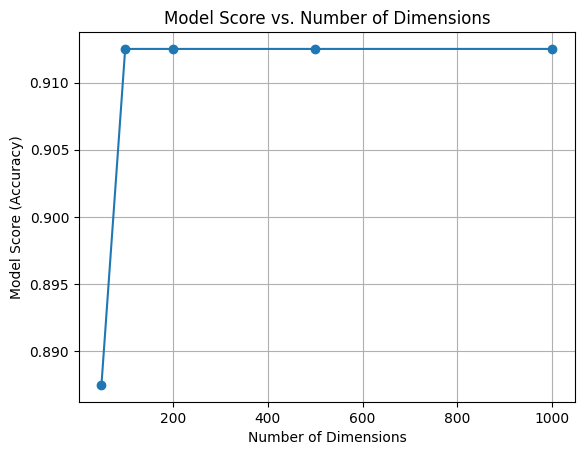

In [16]:
# Specify a list of dimensions for KernelPCA
dimensions = [50, 100, 200, 500, 1000]

# Initialize lists to store model scores
scores = []

# Perform KernelPCA with different dimensions and train a classifier
for n_dims in dimensions:
    kpca = KernelPCA(n_components=n_dims, kernel='rbf')
    X_train_reduced = kpca.fit_transform(X_train)
    X_test_reduced = kpca.transform(X_test)
    
    # Train an SVM classifier
    svm_classifier = SVC()
    svm_classifier.fit(X_train_reduced, y_train)
    
    # Evaluate the model and store the score
    score = svm_classifier.score(X_test_reduced, y_test)
    scores.append(score)
    
# Evaluate the model and print the score for each dimension
    score = svm_classifier.score(X_test_reduced, y_test)
    print(f"Dimension {n_dims}: Model Score (Accuracy) = {score:.4f}")
    
# Plot the change in model score as a function of the number of dimensions
plt.plot(dimensions, scores, marker='o')
plt.title('Model Score vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Model Score (Accuracy)')
plt.grid(True)
plt.show()


### Summary:
As the number of dimensions increases from 50 to 100 and beyond, the model's accuracy improves, reaching a stable accuracy of 91.25% when using 100 or more dimensions for dimensionality reduction. This suggests that retaining a larger number of dimensions can provide better representation for classification tasks on the Olivetti faces dataset.

## b

In [17]:
# Reduce dimensionality using KernelPCA
n_dims = 200  # Choose an appropriate number of dimensions
kpca = KernelPCA(n_components=n_dims, kernel='rbf')
X_reduced = kpca.fit_transform(X)

# Cluster the reduced data into 40 clusters
kmeans = KMeans(n_clusters=40, random_state=42)
cluster_assignments = kmeans.fit_predict(X_reduced)

# Count the number of samples in each cluster
cluster_counts = Counter(cluster_assignments)

# Print true class vs. cluster distribution
for true_class in np.unique(y):
    cluster_distribution = [cluster_counts[i] for i, label in enumerate(y) if label == true_class]
    print(f"True Class {true_class}: {cluster_distribution}")


C:\Users\Bindu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bindu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


True Class 0: [24, 5, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 1: [15, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 3: [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 4: [10, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 5: [23, 6, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 7: [10, 14, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 8: [10, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 9: [11, 17, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 10: [8, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 11: [15, 4, 7, 0, 0, 0, 0, 0, 0, 0]
True Class 12: [7, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 13: [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 14: [4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 15: [7, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 16: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 17: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 18: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 19: [19, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 20: [5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Class 21: [14, 0, 0, 0, 0, 0

### Summary: 
The clustering results provide insights into the distribution of true class labels within clusters, highlighting the complexity of aligning clustering results with original classes in an unsupervised setting.